In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline

## Making the score lists of Directors and Actors

### Fetching additional dataset

In [2]:
df_imdb = pd.read_csv("movie_metadata.csv")
df_imdb = df_imdb.drop(['color', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',
                        'actor_2_name', 'actor_1_facebook_likes', 'genres', 'actor_1_name', 'cast_total_facebook_likes',
                        'actor_3_name', 'facenumber_in_poster', 'language', 'country', 'content_rating', 'plot_keywords',
                        'movie_imdb_link', 'actor_2_facebook_likes', 'duration', 'gross', 'budget',
                        'num_user_for_reviews', 'num_user_for_reviews', 'aspect_ratio', 'movie_facebook_likes'], 1)
df_imdb

,director_name,movie_title,num_voted_users,title_year,imdb_score
0,James Cameron,Avatar,886204,2009.0,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,471220,2007.0,7.1
2,Sam Mendes,Spectre,275868,2015.0,6.8
3,Christopher Nolan,The Dark Knight Rises,1144337,2012.0,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,7.1
5,Andrew Stanton,John Carter,212204,2012.0,6.6
6,Sam Raimi,Spider-Man 3,383056,2007.0,6.2
7,Nathan Greno,Tangled,294810,2010.0,7.8
8,Joss Whedon,Avengers: Age of Ultron,462669,2015.0,7.5
9,David Yates,Harry Potter and the Half-Blood Prince,321795,2009.0,7.5


## Scoring Directors

#### Filter hit movies by removing movies with low IMDB scores

In [3]:
df_imdb_hit = df_imdb
df_imdb_hit['hit'] = np.where(df_imdb_hit['imdb_score']>=7, 1, 0)
df_imdb_hit = df_imdb_hit.sort_values('imdb_score', ascending=False)
df_imdb_hit

,director_name,movie_title,num_voted_users,title_year,imdb_score,hit
2765,John Blanchard,Towering Inferno,10,NaN,9.5,1
1937,Frank Darabont,The Shawshank Redemption,1689764,1994.0,9.3,1
3466,Francis Ford Coppola,The Godfather,1155770,1972.0,9.2,1
4409,John Stockwell,Kickboxer: Vengeance,246,2016.0,9.1,1
2824,NaN,Dekalog,12590,NaN,9.1,1
3207,NaN,Dekalog,12591,NaN,9.1,1
66,Christopher Nolan,The Dark Knight,1676169,2008.0,9.0,1
2837,Francis Ford Coppola,The Godfather: Part II,790926,1974.0,9.0,1
3481,NaN,Fargo,170055,NaN,9.0,1
339,Peter Jackson,The Lord of the Rings: The Return of the King,1215718,2003.0,8.9,1


#### Filter hit movies by removing movies with number of votes less than 1000

In [4]:
df_imdb_1000 = df_imdb_hit
df_imdb_1000 = df_imdb_1000[df_imdb_1000['num_voted_users'] >= 1000]
df_imdb_1000

,director_name,movie_title,num_voted_users,title_year,imdb_score,hit
1937,Frank Darabont,The Shawshank Redemption,1689764,1994.0,9.3,1
3466,Francis Ford Coppola,The Godfather,1155770,1972.0,9.2,1
2824,NaN,Dekalog,12590,NaN,9.1,1
3207,NaN,Dekalog,12591,NaN,9.1,1
66,Christopher Nolan,The Dark Knight,1676169,2008.0,9.0,1
2837,Francis Ford Coppola,The Godfather: Part II,790926,1974.0,9.0,1
3481,NaN,Fargo,170055,NaN,9.0,1
339,Peter Jackson,The Lord of the Rings: The Return of the King,1215718,2003.0,8.9,1
4822,Sidney Lumet,12 Angry Men,447785,1957.0,8.9,1
4498,Sergio Leone,"The Good, the Bad and the Ugly",503509,1966.0,8.9,1


#### Removing Duplicates in the movie_title column

In [5]:
df_imdb_duplicate = df_imdb_1000.drop_duplicates(subset='movie_title')
df_imdb_duplicate

,director_name,movie_title,num_voted_users,title_year,imdb_score,hit
1937,Frank Darabont,The Shawshank Redemption,1689764,1994.0,9.3,1
3466,Francis Ford Coppola,The Godfather,1155770,1972.0,9.2,1
2824,NaN,Dekalog,12590,NaN,9.1,1
66,Christopher Nolan,The Dark Knight,1676169,2008.0,9.0,1
2837,Francis Ford Coppola,The Godfather: Part II,790926,1974.0,9.0,1
3481,NaN,Fargo,170055,NaN,9.0,1
339,Peter Jackson,The Lord of the Rings: The Return of the King,1215718,2003.0,8.9,1
4822,Sidney Lumet,12 Angry Men,447785,1957.0,8.9,1
4498,Sergio Leone,"The Good, the Bad and the Ugly",503509,1966.0,8.9,1
3355,Quentin Tarantino,Pulp Fiction,1324680,1994.0,8.9,1


#### Removing rows without director name

In [6]:
df_imdb_withDirector = df_imdb_duplicate.dropna(subset=['director_name'])
df_imdb_withDirector

,director_name,movie_title,num_voted_users,title_year,imdb_score,hit
1937,Frank Darabont,The Shawshank Redemption,1689764,1994.0,9.3,1
3466,Francis Ford Coppola,The Godfather,1155770,1972.0,9.2,1
66,Christopher Nolan,The Dark Knight,1676169,2008.0,9.0,1
2837,Francis Ford Coppola,The Godfather: Part II,790926,1974.0,9.0,1
339,Peter Jackson,The Lord of the Rings: The Return of the King,1215718,2003.0,8.9,1
4822,Sidney Lumet,12 Angry Men,447785,1957.0,8.9,1
4498,Sergio Leone,"The Good, the Bad and the Ugly",503509,1966.0,8.9,1
3355,Quentin Tarantino,Pulp Fiction,1324680,1994.0,8.9,1
1874,Steven Spielberg,Schindler's List,865020,1993.0,8.9,1
683,David Fincher,Fight Club,1347461,1999.0,8.8,1


#### Making groups by director's name

In [7]:
df_directorGroup = df_imdb_withDirector.groupby('director_name')
df_directorGroup.mean()

,num_voted_users,title_year,imdb_score,hit
director_name,,,,
Aaron Hann,13279.000000,2015.000000,6.000000,0.000000
Aaron Schneider,19147.000000,2009.000000,7.100000,1.000000
Aaron Seltzer,50415.000000,2006.000000,2.700000,0.000000
Abel Ferrara,6921.000000,1996.000000,6.600000,0.000000
Adam Brooks,127760.000000,2008.000000,7.200000,1.000000
Adam Carolla,1351.000000,2015.000000,6.100000,0.000000
Adam Goldberg,1618.000000,2003.000000,5.400000,0.000000
Adam Green,23349.000000,2006.000000,5.700000,0.000000
Adam Jay Epstein,9560.000000,2008.000000,3.800000,0.000000


#### Building table in useful format and Scoring

In [8]:
df_bestDirector = pd.DataFrame()
df_bestDirector['director_name'] = df_directorGroup.groups.keys()
df_bestDirector['movies'] = df_directorGroup.size().values
df_bestDirector['imdb'] = df_directorGroup['imdb_score'].sum().values
df_bestDirector['imdb_avrg'] = df_directorGroup['imdb_score'].mean().values
df_bestDirector['rank'] = df_bestDirector['imdb'].rank()
df_bestDirector['percentage'] = df_bestDirector['imdb'].rank(pct=True)
df_bestDirector.sort_values('imdb', ascending=False)

,director_name,movies,imdb,imdb_avrg,rank,percentage
1876,Steven Spielberg,26,194.5,7.480769,2083.0,1.000000
2065,Woody Allen,22,154.2,7.009091,2082.0,0.999520
1274,Martin Scorsese,20,153.2,7.660000,2081.0,0.999040
342,Clint Eastwood,20,144.5,7.225000,2080.0,0.998560
1650,Ridley Scott,16,114.1,7.131250,2079.0,0.998080
1823,Spike Lee,15,101.0,6.733333,2078.0,0.997600
1875,Steven Soderbergh,15,100.2,6.680000,2077.0,0.997120
1928,Tim Burton,14,98.7,7.050000,2076.0,0.996639
1469,Oliver Stone,14,97.3,6.950000,2075.0,0.996159
1699,Robert Zemeckis,13,95.0,7.307692,2074.0,0.995679


## Scoring Actors

#### Fetching the same csv file with scoring director but showing different columns

In [9]:
df_imdb = pd.read_csv("movie_metadata.csv")
df_imdb = df_imdb.drop(['color', 'director_name', 'num_critic_for_reviews', 'director_facebook_likes',
                        'genres', 'facenumber_in_poster', 'language', 'country', 'content_rating', 'plot_keywords',
                        'movie_imdb_link', 'title_year', 'aspect_ratio', 'actor_1_facebook_likes',
                        'cast_total_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                        'movie_facebook_likes', 'num_user_for_reviews', 'budget', 'gross', 'duration'], 1)
df_imdb = df_imdb[['movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'num_voted_users', 'imdb_score']]
df_imdb

,movie_title,actor_1_name,actor_2_name,actor_3_name,num_voted_users,imdb_score
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,886204,7.9
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,471220,7.1
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,275868,6.8
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,1144337,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,Rob Walker,NaN,8,7.1
5,John Carter,Daryl Sabara,Samantha Morton,Polly Walker,212204,6.6
6,Spider-Man 3,J.K. Simmons,James Franco,Kirsten Dunst,383056,6.2
7,Tangled,Brad Garrett,Donna Murphy,M.C. Gainey,294810,7.8
8,Avengers: Age of Ultron,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,462669,7.5
9,Harry Potter and the Half-Blood Prince,Alan Rickman,Daniel Radcliffe,Rupert Grint,321795,7.5


#### Do almost the same with scoring directors

In [10]:
df_imdb_hit = df_imdb
df_imdb_hit = df_imdb_hit.sort_values('imdb_score', ascending=False)
df_imdb_hit

,movie_title,actor_1_name,actor_2_name,actor_3_name,num_voted_users,imdb_score
2765,Towering Inferno,Martin Short,Andrea Martin,Joe Flaherty,10,9.5
1937,The Shawshank Redemption,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,1689764,9.3
3466,The Godfather,Al Pacino,Marlon Brando,Robert Duvall,1155770,9.2
4409,Kickboxer: Vengeance,Matthew Ziff,T.J. Storm,Sam Medina,246,9.1
2824,Dekalog,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,12590,9.1
3207,Dekalog,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,12591,9.1
66,The Dark Knight,Christian Bale,Heath Ledger,Morgan Freeman,1676169,9.0
2837,The Godfather: Part II,Robert De Niro,Al Pacino,Robert Duvall,790926,9.0
3481,Fargo,Kirsten Dunst,Adam Goldberg,Oliver Platt,170055,9.0
339,The Lord of the Rings: The Return of the King,Orlando Bloom,Billy Boyd,Bernard Hill,1215718,8.9


In [11]:
df_imdb_1000 = df_imdb_hit
df_imdb_1000 = df_imdb_1000[df_imdb_1000['num_voted_users'] >= 1000]
df_imdb_1000

,movie_title,actor_1_name,actor_2_name,actor_3_name,num_voted_users,imdb_score
1937,The Shawshank Redemption,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,1689764,9.3
3466,The Godfather,Al Pacino,Marlon Brando,Robert Duvall,1155770,9.2
2824,Dekalog,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,12590,9.1
3207,Dekalog,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,12591,9.1
66,The Dark Knight,Christian Bale,Heath Ledger,Morgan Freeman,1676169,9.0
2837,The Godfather: Part II,Robert De Niro,Al Pacino,Robert Duvall,790926,9.0
3481,Fargo,Kirsten Dunst,Adam Goldberg,Oliver Platt,170055,9.0
339,The Lord of the Rings: The Return of the King,Orlando Bloom,Billy Boyd,Bernard Hill,1215718,8.9
4822,12 Angry Men,Jack Warden,Lee J. Cobb,John Fiedler,447785,8.9
4498,"The Good, the Bad and the Ugly",Clint Eastwood,Luigi Pistilli,Enzo Petito,503509,8.9


In [12]:
df_imdb_duplicate = df_imdb_1000.drop_duplicates(subset='movie_title')
df_imdb_duplicate

,movie_title,actor_1_name,actor_2_name,actor_3_name,num_voted_users,imdb_score
1937,The Shawshank Redemption,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,1689764,9.3
3466,The Godfather,Al Pacino,Marlon Brando,Robert Duvall,1155770,9.2
2824,Dekalog,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,12590,9.1
66,The Dark Knight,Christian Bale,Heath Ledger,Morgan Freeman,1676169,9.0
2837,The Godfather: Part II,Robert De Niro,Al Pacino,Robert Duvall,790926,9.0
3481,Fargo,Kirsten Dunst,Adam Goldberg,Oliver Platt,170055,9.0
339,The Lord of the Rings: The Return of the King,Orlando Bloom,Billy Boyd,Bernard Hill,1215718,8.9
4822,12 Angry Men,Jack Warden,Lee J. Cobb,John Fiedler,447785,8.9
4498,"The Good, the Bad and the Ugly",Clint Eastwood,Luigi Pistilli,Enzo Petito,503509,8.9
3355,Pulp Fiction,Bruce Willis,Eric Stoltz,Phil LaMarr,1324680,8.9


#### Since there are 3 columns which contains the name of the actors, I had to groupby for 3 times column by column. 'frequency' column represents how many times the actor appears in the n-th actor column. 'actor_n' represents the name.

In [13]:
df_actorGroup1 = df_imdb_duplicate.groupby(['actor_1_name'])
df1 = df_actorGroup1.size().to_frame()
df1['actor_1'] = df1.index
df1 = df1.reset_index(drop=True)
df1 = df1.rename(columns={0: 'frequency'})

df_actorGroup2 = df_imdb_duplicate.groupby(['actor_2_name'])
df2 = df_actorGroup2.size().to_frame()
df2['actor_2'] = df2.index
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns={0: 'frequency'})

df_actorGroup3 = df_imdb_duplicate.groupby(['actor_3_name'])
df3 = df_actorGroup3.size().to_frame()
df3['actor_3'] = df3.index
df3 = df3.reset_index(drop=True)
df3 = df3.rename(columns={0: 'frequency'})

In [14]:
df1.head()

,frequency,actor_1
0,1,50 Cent
1,1,A.J. Buckley
2,1,Aaliyah
3,1,Aasif Mandvi
4,3,Abbie Cornish


In [15]:
df2.head()

,frequency,actor_2
0,3,50 Cent
1,1,A. Michael Baldwin
2,1,A.J. Buckley
3,2,AJ Michalka
4,1,Aaron Ashmore


In [16]:
df3.head()

,frequency,actor_3
0,1,50 Cent
1,3,A.J. Buckley
2,1,A.J. Langer
3,1,Aaliyah
4,1,Aaron Hill


#### Since I have 3 separate datasets, I have to merge them together. By using joing function and outer parameter, I joined all 3 datasets together but made all the names of the actors remain, not deleted.

In [17]:
df3 = df3.set_index('actor_3').join(df2.set_index('actor_2'), lsuffix='_3', rsuffix='_2', how='outer')
df3 = df3.join(df1.set_index('actor_1'), lsuffix='_3', rsuffix='_1', how='outer')

In [18]:
df_bestActor = df3
df_bestActor

,frequency_3,frequency_2,frequency
50 Cent,1.0,3.0,1.0
A. Michael Baldwin,NaN,1.0,NaN
A.J. Buckley,3.0,1.0,1.0
A.J. Langer,1.0,NaN,NaN
AJ Michalka,NaN,2.0,NaN
Aaliyah,1.0,NaN,1.0
Aaron Ashmore,NaN,1.0,NaN
Aaron Hill,1.0,NaN,NaN
Aaron Hughes,NaN,1.0,NaN
Aaron Kwok,NaN,1.0,NaN


In [19]:
df_bestActor = df_bestActor.fillna(0)
df_bestActor['total frequency'] = df_bestActor['frequency_3'] + df_bestActor['frequency_2'] + df_bestActor['frequency']
df_bestActor

,frequency_3,frequency_2,frequency,total frequency
50 Cent,1.0,3.0,1.0,5.0
A. Michael Baldwin,0.0,1.0,0.0,1.0
A.J. Buckley,3.0,1.0,1.0,5.0
A.J. Langer,1.0,0.0,0.0,1.0
AJ Michalka,0.0,2.0,0.0,2.0
Aaliyah,1.0,0.0,1.0,2.0
Aaron Ashmore,0.0,1.0,0.0,1.0
Aaron Hill,1.0,0.0,0.0,1.0
Aaron Hughes,0.0,1.0,0.0,1.0
Aaron Kwok,0.0,1.0,0.0,1.0


In [20]:
df_bestActor['rank'] = df_bestActor['total frequency'].rank()
df_bestActor['percentage'] = df_bestActor['total frequency'].rank(pct=True)
df_bestActor = df_bestActor.sort_values('total frequency', ascending=False)
df_bestActor = df_bestActor.reset_index()
df_bestActor = df_bestActor.rename(columns={'index': 'Actor'})
df_bestActor

,Actor,frequency_3,frequency_2,frequency,total frequency,rank,percentage
0,Robert De Niro,0.0,5.0,47.0,52.0,5586.0,1.000000
1,Morgan Freeman,2.0,18.0,22.0,42.0,5585.0,0.999821
2,Bruce Willis,1.0,9.0,28.0,38.0,5584.0,0.999642
3,Matt Damon,1.0,7.0,29.0,37.0,5583.0,0.999463
4,Steve Buscemi,1.0,8.0,27.0,36.0,5582.0,0.999284
5,Johnny Depp,0.0,0.0,35.0,35.0,5581.0,0.999105
6,Brad Pitt,2.0,13.0,18.0,33.0,5579.5,0.998836
7,Nicolas Cage,1.0,0.0,32.0,33.0,5579.5,0.998836
8,Will Ferrell,3.0,9.0,20.0,32.0,5577.5,0.998478
9,Bill Murray,1.0,5.0,26.0,32.0,5577.5,0.998478


## Giving Scores to the casts from Main dataset

In [21]:
df_main = pd.read_csv("IMDB-Movie-Data.csv")
df_main

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [22]:
df_main = df_main[['Rank', 'Title', 'Genre', 'Director', 'Actors', 'Year', 'Rating', 'Votes', 'Revenue (Millions)',
                   'Metascore']]
df_main

,Rank,Title,Genre,Director,Actors,Year,Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,7.0,192177,100.01,41.0


In [23]:
df_movie_assess = pd.DataFrame()
df_movie_assess['Title'] = df_main['Title']
df_movie_assess['Director'] = df_main['Director']

In [24]:
df_actor_split = df_main['Actors'].str.split(',', expand=True)
df_movie_assess['actor 0'] = df_actor_split[0].str.strip()
df_movie_assess['actor 1'] = df_actor_split[1].str.strip()
df_movie_assess['actor 2'] = df_actor_split[2].str.strip()
df_movie_assess['actor 3'] = df_actor_split[3].str.strip()
df_movie_assess['Rating'] = df_main['Rating']
df_movie_assess

,Title,Director,actor 0,actor 1,actor 2,actor 3,Rating
0,Guardians of the Galaxy,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,8.1
1,Prometheus,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,7.0
2,Split,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,7.3
3,Sing,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,7.2
4,Suicide Squad,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,6.2
5,The Great Wall,Yimou Zhang,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,6.1
6,La La Land,Damien Chazelle,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,8.3
7,Mindhorn,Sean Foley,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,6.4
8,The Lost City of Z,James Gray,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,7.1
9,Passengers,Morten Tyldum,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne,7.0


#### Giving directors and actors individual scores by iteration

In [25]:
def compare(df1, df2, df1_comparingColumn, df1_scoreColumn, df2_comparingColumn, df2_scoreColumn, df1_no, df2_no):
    # df1: main dataset, df2: reference dataset
    for x in range(df1_no):
        if df1[df1_comparingColumn][x] in df2[df2_comparingColumn].tolist():
            for n in range(df2_no):
                    name = df1[df1_comparingColumn][x]
                    if name == df2[df2_comparingColumn][n]:
                        df1[df1_scoreColumn][x] = df2[df2_scoreColumn][n]
        else:
            df1[df1_scoreColumn][x] = 0

In [26]:
df_movie_assess['dScore'] = None
compare(df_movie_assess, df_bestDirector, "Director", "dScore", "director_name", "percentage", 1000, 2083)

/Users/hyewonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hyewonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [27]:
df_movie_assess['a0Score'] = None
df_movie_assess['a1Score'] = None
df_movie_assess['a2Score'] = None
df_movie_assess['a3Score'] = None
compare(df_movie_assess, df_bestActor, "actor 0", "a0Score", "Actor", "percentage", 1000, 5586)
compare(df_movie_assess, df_bestActor, "actor 1", "a1Score", "Actor", "percentage", 1000, 5586)
compare(df_movie_assess, df_bestActor, "actor 2", "a2Score", "Actor", "percentage", 1000, 5586)
compare(df_movie_assess, df_bestActor, "actor 3", "a3Score", "Actor", "percentage", 1000, 5586)
df_movie_assess

/Users/hyewonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/hyewonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,Director,actor 0,actor 1,actor 2,actor 3,Rating,dScore,a0Score,a1Score,a2Score,a3Score
0,Guardians of the Galaxy,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,8.1,0.827412,0,0.987379,0.989438,0
1,Prometheus,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,7.0,0.99808,0,0,0.985052,0.993466
2,Split,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,7.3,0.977436,0,0,0,0
3,Sing,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,7.2,0,0.995614,0,0.894916,0.99642
4,Suicide Squad,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,6.2,0.950552,0.990781,0,0,0
5,The Great Wall,Yimou Zhang,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,6.1,0.952952,0.999463,0,0,0.894916
6,La La Land,Damien Chazelle,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,8.3,0.596015,0.986305,0.97995,0.85768,0.997494
7,Mindhorn,Sean Foley,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,6.4,0,0.690834,0,0,0
8,The Lost City of Z,James Gray,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,7.1,0.879741,0.919262,0.937075,0,0
9,Passengers,Morten Tyldum,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne,7.0,0.757561,0.985052,0,0,0


In [28]:
df_movie_assess['aTotalScore'] = df_movie_assess['a0Score']+df_movie_assess['a1Score']+df_movie_assess['a2Score']+df_movie_assess['a3Score']

In [29]:
df_movie_assess['Star Rating'] = df_movie_assess['Rating'].astype(int)
df_movie_assess

,Title,Director,actor 0,actor 1,actor 2,actor 3,Rating,dScore,a0Score,a1Score,a2Score,a3Score,aTotalScore,Star Rating
0,Guardians of the Galaxy,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,8.1,0.827412,0,0.987379,0.989438,0,1.97682,8
1,Prometheus,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,7.0,0.99808,0,0,0.985052,0.993466,1.97852,7
2,Split,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,7.3,0.977436,0,0,0,0,0,7
3,Sing,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,7.2,0,0.995614,0,0.894916,0.99642,2.88695,7
4,Suicide Squad,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,6.2,0.950552,0.990781,0,0,0,0.990781,6
5,The Great Wall,Yimou Zhang,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,6.1,0.952952,0.999463,0,0,0.894916,1.89438,6
6,La La Land,Damien Chazelle,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,8.3,0.596015,0.986305,0.97995,0.85768,0.997494,3.82143,8
7,Mindhorn,Sean Foley,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,6.4,0,0.690834,0,0,0,0.690834,6
8,The Lost City of Z,James Gray,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,7.1,0.879741,0.919262,0.937075,0,0,1.85634,7
9,Passengers,Morten Tyldum,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne,7.0,0.757561,0.985052,0,0,0,0.985052,7


#### Split the dataset into training and test set / scatter plot with dScore and aScore (not very recognisable)

Train shape: (750, 2) (750,)
Test shape: (250, 2) (250,)


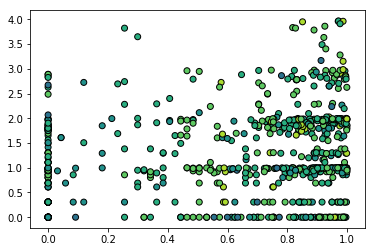

In [30]:
from sklearn.model_selection import train_test_split

movie_X = df_movie_assess[['dScore', 'aTotalScore']]
movie_y = df_movie_assess['Star Rating']

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(movie_X, movie_y, test_size=0.25)
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

plt.scatter(X_train['dScore'], X_train['aTotalScore'], edgecolors='k', c=y_train)

#### Scatter plot with dScore + aScore and ratings

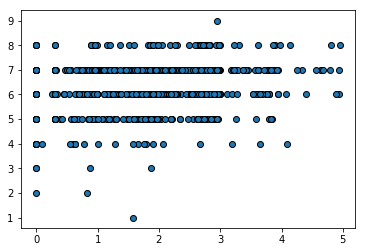

In [31]:
X_train_single = pd.DataFrame(X_train['dScore'] + X_train['aTotalScore'])
plt.scatter(X_train_single, y_train, edgecolor='k')

#### Scatter plot with only dScore and ratings to find any correlation but failed

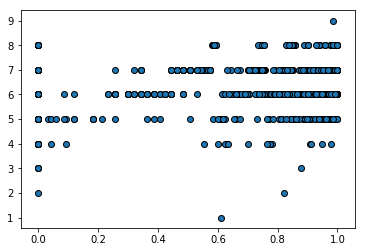

In [32]:
X_train_director = pd.DataFrame(X_train['dScore'])
plt.scatter(X_train_director, y_train, edgecolor='k')

## Fitting the model

#### Trying Decision Tree and Visualisation

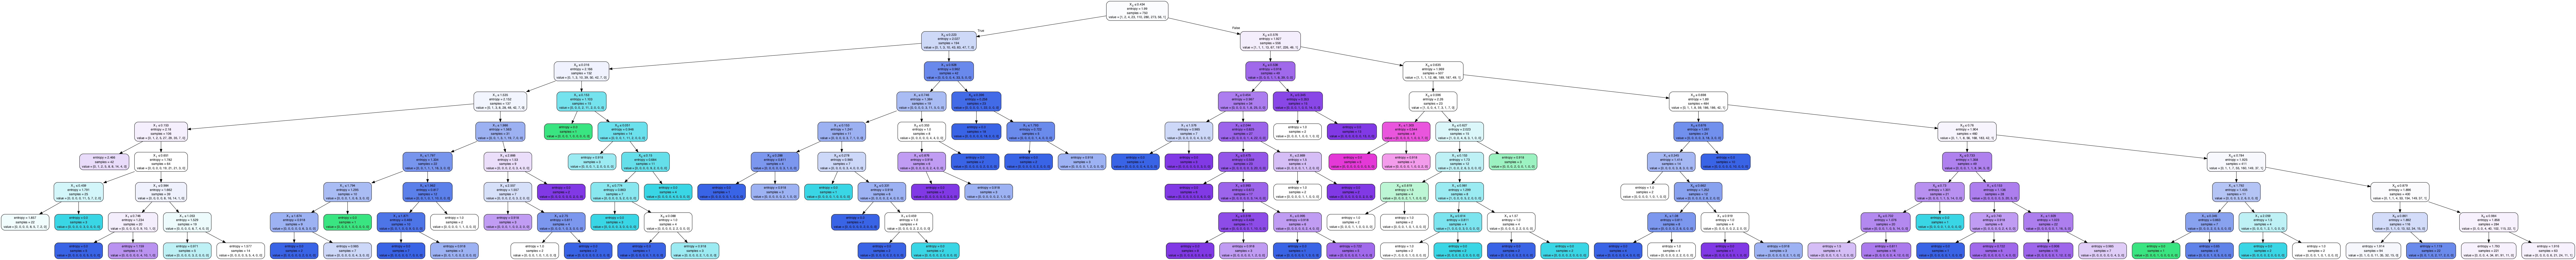

In [33]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

clf_dt = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = 4, max_depth = 8)
clf_dt = clf_dt.fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
from sklearn.metrics import accuracy_score
def calculate_accuracy(clf, X_test, y_test):
    return accuracy_score(clf.predict(X_test), y_test)

print(calculate_accuracy(clf_dt, X_test, y_test))

0.448


### Random Forest with max_depth=4

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_r4 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf_r4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
print(calculate_accuracy(clf_r4, X_test, y_test))

0.416


### Random Forest with max_depth=8

In [37]:
clf_r8 = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
clf_r8.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
print(calculate_accuracy(clf_r8, X_test, y_test))

0.452


## Predicting 2017 movies' star ratings

#### Giving individual scores to 2017 movies

In [39]:
df_2017 = pd.read_csv("2017_movie_data_director_actors_rating.csv")
df_2017 = df_2017[['MovieName', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor 4']]
df_2017

,MovieName,Director,Actor 1,Actor 2,Actor 3,Actor 4
0,A Ghost Story,David Lowery,Casey Affleck,Rooney Mara,McColm Cephas Jr.,Kenneisha Thompson
1,Alien: Covenant,Ridley Scott,Michael Fassbender,Katherine Waterston,Billy Crudup,Danny McBride
2,American Made,Doug Liman,Tom Cruise,Domhnall Gleeson,Sarah Wright,Jesse Plemons
3,Anna and the Apocalypse,John McPhail,Ella Hunt,Malcolm Cumming,Sarah Swire,Christopher Leveaux
4,Baby Driver,Edgar Wright,Ansel Elgort,Jon Bernthal,Jon Hamm,Eiza González
5,Beatriz at Dinner,Miguel Arteta,Salma Hayek,John Lithgow,Connie Britton,Jay Duplass
6,Beauty and the Beast,Bill Condon,Emma Watson,Dan Stevens,Luke Evans,Josh Gad
7,Blade Runner 2049,Denis Villeneuve,Harrison Ford,Ryan Gosling,Ana de Armas,Dave Bautista
8,BPM (Beats Per Minute),Robin Campillo,Nahuel Pérez Biscayart,Arnaud Valois,Adèle Haenel,Antoine Reinartz
9,Brad's Status,Mike White,Ben Stiller,Austin Abrams,Jenna Fischer,Michael Sheen


In [40]:
df_2017['dScore'] = None
compare(df_2017, df_bestDirector, "Director", "dScore", "director_name", "percentage", 80, 2083)

df_2017['a0Score'] = None
df_2017['a1Score'] = None
df_2017['a2Score'] = None
df_2017['a3Score'] = None
compare(df_2017, df_bestActor, "Actor 1", "a0Score", "Actor", "percentage", 80, 5586)
compare(df_2017, df_bestActor, "Actor 1", "a1Score", "Actor", "percentage", 80, 5586)
compare(df_2017, df_bestActor, "Actor 2", "a2Score", "Actor", "percentage", 80, 5586)
compare(df_2017, df_bestActor, "Actor 3", "a3Score", "Actor", "percentage", 80, 5586)

In [41]:
df_2017['aTotalScore'] = df_2017['a0Score']+df_2017['a1Score']+df_2017['a2Score']+df_2017['a3Score']
df_2017

,MovieName,Director,Actor 1,Actor 2,Actor 3,Actor 4,dScore,a0Score,a1Score,a2Score,a3Score,aTotalScore
0,A Ghost Story,David Lowery,Casey Affleck,Rooney Mara,McColm Cephas Jr.,Kenneisha Thompson,0,0.306033,0.306033,0,0,0.612066
1,Alien: Covenant,Ridley Scott,Michael Fassbender,Katherine Waterston,Billy Crudup,Danny McBride,0.99808,0.985052,0.985052,0.690834,0.9599,3.62084
2,American Made,Doug Liman,Tom Cruise,Domhnall Gleeson,Sarah Wright,Jesse Plemons,0.968795,0.996957,0.996957,0,0.690834,2.68475
3,Anna and the Apocalypse,John McPhail,Ella Hunt,Malcolm Cumming,Sarah Swire,Christopher Leveaux,0,0,0,0,0,0
4,Baby Driver,Edgar Wright,Ansel Elgort,Jon Bernthal,Jon Hamm,Eiza González,0.903505,0,0,0,0.950233,0.950233
5,Beatriz at Dinner,Miguel Arteta,Salma Hayek,John Lithgow,Connie Britton,Jay Duplass,0.910706,0.989438,0.989438,0,0,1.97888
6,Beauty and the Beast,Bill Condon,Emma Watson,Dan Stevens,Luke Evans,Josh Gad,0.912866,0.894916,0.894916,0,0,1.78983
7,Blade Runner 2049,Denis Villeneuve,Harrison Ford,Ryan Gosling,Ana de Armas,Dave Bautista,0.852136,0.997494,0.997494,0.986305,0,2.98129
8,BPM (Beats Per Minute),Robin Campillo,Nahuel Pérez Biscayart,Arnaud Valois,Adèle Haenel,Antoine Reinartz,0,0,0,0,0,0
9,Brad's Status,Mike White,Ben Stiller,Austin Abrams,Jenna Fischer,Michael Sheen,0,0,0,0,0.802095,0.802095


#### Predicting the star rate of 2017 movies with Random Forest prediction model

In [42]:
predict_X = df_2017[['dScore', 'aTotalScore']]
df_2017['prediction result'] = clf_r8.predict(predict_X)
df_2017

,MovieName,Director,Actor 1,Actor 2,Actor 3,Actor 4,dScore,a0Score,a1Score,a2Score,a3Score,aTotalScore,prediction result
0,A Ghost Story,David Lowery,Casey Affleck,Rooney Mara,McColm Cephas Jr.,Kenneisha Thompson,0,0.306033,0.306033,0,0,0.612066,5
1,Alien: Covenant,Ridley Scott,Michael Fassbender,Katherine Waterston,Billy Crudup,Danny McBride,0.99808,0.985052,0.985052,0.690834,0.9599,3.62084,8
2,American Made,Doug Liman,Tom Cruise,Domhnall Gleeson,Sarah Wright,Jesse Plemons,0.968795,0.996957,0.996957,0,0.690834,2.68475,7
3,Anna and the Apocalypse,John McPhail,Ella Hunt,Malcolm Cumming,Sarah Swire,Christopher Leveaux,0,0,0,0,0,0,7
4,Baby Driver,Edgar Wright,Ansel Elgort,Jon Bernthal,Jon Hamm,Eiza González,0.903505,0,0,0,0.950233,0.950233,7
5,Beatriz at Dinner,Miguel Arteta,Salma Hayek,John Lithgow,Connie Britton,Jay Duplass,0.910706,0.989438,0.989438,0,0,1.97888,7
6,Beauty and the Beast,Bill Condon,Emma Watson,Dan Stevens,Luke Evans,Josh Gad,0.912866,0.894916,0.894916,0,0,1.78983,6
7,Blade Runner 2049,Denis Villeneuve,Harrison Ford,Ryan Gosling,Ana de Armas,Dave Bautista,0.852136,0.997494,0.997494,0.986305,0,2.98129,7
8,BPM (Beats Per Minute),Robin Campillo,Nahuel Pérez Biscayart,Arnaud Valois,Adèle Haenel,Antoine Reinartz,0,0,0,0,0,0,7
9,Brad's Status,Mike White,Ben Stiller,Austin Abrams,Jenna Fischer,Michael Sheen,0,0,0,0,0.802095,0.802095,7


#### Compare the actual rating and the prediction results

In [45]:
df_real = pd.read_csv("2017_movie_data_director_actors_rating.csv")
df_real

,MovieName,IMDB,Rating,Director,Actor 1,Actor 2,Actor 3,Actor 4
0,A Ghost Story,www.imdb.com/title/tt6265828/,6.8,David Lowery,Casey Affleck,Rooney Mara,McColm Cephas Jr.,Kenneisha Thompson
1,Alien: Covenant,www.imdb.com/title/tt2316204/,6.4,Ridley Scott,Michael Fassbender,Katherine Waterston,Billy Crudup,Danny McBride
2,American Made,http://www.imdb.com/title/tt3532216/,7.2,Doug Liman,Tom Cruise,Domhnall Gleeson,Sarah Wright,Jesse Plemons
3,Anna and the Apocalypse,www.imdb.com/title/tt6433880/,6.8,John McPhail,Ella Hunt,Malcolm Cumming,Sarah Swire,Christopher Leveaux
4,Baby Driver,www.imdb.com/title/tt3890160/,7.6,Edgar Wright,Ansel Elgort,Jon Bernthal,Jon Hamm,Eiza González
5,Beatriz at Dinner,www.imdb.com/title/tt5929750/,6.1,Miguel Arteta,Salma Hayek,John Lithgow,Connie Britton,Jay Duplass
6,Beauty and the Beast,www.imdb.com/title/tt2771200/,7.2,Bill Condon,Emma Watson,Dan Stevens,Luke Evans,Josh Gad
7,Blade Runner 2049,http://www.imdb.com/title/tt1856101/,8.0,Denis Villeneuve,Harrison Ford,Ryan Gosling,Ana de Armas,Dave Bautista
8,BPM (Beats Per Minute),www.imdb.com/title/tt6135348/,7.5,Robin Campillo,Nahuel Pérez Biscayart,Arnaud Valois,Adèle Haenel,Antoine Reinartz
9,Brad's Status,www.imdb.com/title/tt5884230/,6.5,Mike White,Ben Stiller,Austin Abrams,Jenna Fischer,Michael Sheen


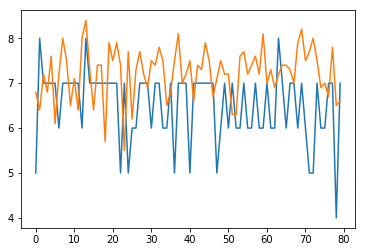

<Figure size 21600x7200 with 0 Axes>

In [57]:
plt.plot(df_2017['prediction result'])
plt.plot(df_real['Rating'])
plt.figure(figsize=(300, 100))
plt.show()